<a href="https://colab.research.google.com/github/Anupam-Durutkar/Exploratory-Analysis-On-Play-Store-Apps/blob/main/Exploratory_Analysis_On_Play_Store_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prject Qustion**

---


## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Topic To Project**

---

* Introduction to data - [Done]- Anupam
* Importing libraries - [Done] - Anupam
* Importing dataset - [Done] -Anupam
* Basic Data Exploration(Understanding the Dataset) - [Inprogress] - Anupam
* Data Cleaning - [Inprogress] - Aswin
  * Checking for null values
  * Delete data duplicated
  * Check Qutliers
* Exploratory Data Analysis (EDA) - [To Do] - For All
  * Sentiment analysis of user reviews - [To Do] - Aditya
* Check Co-relation - [To Do]
* CONCLUSION - [To Do] - This at the End of coding
* Visualization - [Inprogress] - Anupam
* Modularity of code - [To Do]

# **Importing Dataset**

---

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from matplotlib import pyplot as plt # visualization tool
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.io as iplot
iplot.renderers.default = 'colab'

import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#pip install plotly --upgrade

In [ ]:
import plotly
plotly.__version__

'4.4.1'

# Mounted Google Drive

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#**Importing Dataset** 

---


#### Read the datasets into dataframes

In [ ]:
play_store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_folder/Play Store Data.csv")
user_ratings_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project_folder/User Reviews.csv" ,encoding='utf8')

##Copying the database for comparison Original and clean version
play_store_df_original = play_store_df.copy()
play_store_df_original.shape

(10841, 13)

In [ ]:
## Display the Play Store App data
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
## Display the User Ratings data
user_ratings_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


#### Explore the structure of the datasets

In [ ]:
## Play Store App Data
print("The length of the play_store_df is",len(play_store_df))
print("The number of rows and columns in play_store_df is",play_store_df.shape)
print("The number of unique Apps in play_store_df is",play_store_df["App"].nunique())

The length of the play_store_df is 10841
The number of rows and columns in play_store_df is (10841, 13)
The number of unique Apps in play_store_df is 9660


In [ ]:
## User Reviews Data
print("The length of the user_ratings_df is",len(user_ratings_df))
print("The number of rows and columns in user_ratings_df is",user_ratings_df.shape)
print("The number of unique Apps in user_ratings_df is",user_ratings_df["App"].nunique())

The length of the user_ratings_df is 64295
The number of rows and columns in user_ratings_df is (64295, 5)
The number of unique Apps in user_ratings_df is 1074


In [ ]:
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
play_store_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367,NaN,NaN,NaN,4.19334,0.537431,1,4,4.3,4.5,19
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Basic Data Cleaning

##### Handling the Null values

The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea about the distribution of missing values.

In [ ]:
## Let's get the ratio of missing values for each feature
##Creating Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(play_store_df)

Your selected dataframe has 13 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Rating,1474,13.60
Current Ver,8,0.07
Android Ver,3,0.03
Type,1,0.01
Content Rating,1,0.01


In [ ]:
## Drop the Null values in Rating column
play_store_df.dropna(subset =['Rating'], inplace = True)
print(f"The number of rows and columns in play_store_df before is {play_store_df_original.shape} and after dropping the NAs from 'Rating' is {play_store_df.shape}")

The number of rows and columns in play_store_df before is (10841, 13) and after dropping the NAs from 'Rating' is (9367, 13)


In [ ]:
## Recalculate the missing value ratio
missing_values_table(play_store_df)

Your selected dataframe has 13 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Current Ver,4,0.04
Android Ver,3,0.03
Content Rating,1,0.01


Since the ratio of missing values for the rest of the columns is less (<0.05), we proceed to fill these with the mode values instead of dropping these rows.

In [ ]:
## Fill the three columns with the mode value
play_store_df['Current Ver'] = play_store_df['Current Ver'].fillna(play_store_df['Current Ver'].mode()[0])
play_store_df['Android Ver'] = play_store_df['Android Ver'].fillna(play_store_df['Android Ver'].mode()[0])
play_store_df['Content Rating'] = play_store_df['Content Rating'].fillna(play_store_df['Content Rating'].mode()[0])

missing_values_table(play_store_df)

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


##### Handling Duplicates

In [ ]:
## Drop the duplicates from the "App" column
play_store_df.drop_duplicates(subset='App', inplace=True)
print(f"The number of rows and columns in play_store_df before is {play_store_df_original.shape} and after dropping the duplicates is {play_store_df.shape}")

The number of rows and columns in play_store_df before is (10841, 13) and after dropping the duplicates is (8197, 13)


##### **Check Qutliers**

---


On studying the dataset further, it was found that there was a data with some kind of weird anomaly. Let us find out the row in the data and purge it.

In [ ]:
play_store_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
play_store_df[play_store_df['Rating'] == 19.0]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


We see that this entry of our dataset is having a Rating of 19.0 which is way higher than the maximum rating of 5.0. Also, The value in the Reviews column has an alphabet which makes it a lone entry to have so. Hence we are removing this particular row to make our analysis easier.

In [ ]:
## Drop the row that has incorrect values for our features
play_store_df = play_store_df[~(play_store_df['Installs'] == "Free")].reset_index(drop=True)

##### Checking and Converting the Following columns for EDA analysis
As some of feature coloum are non-numerical value so let's convert the categorical variables the into numerical for ease of analysis.

######**Installs**

In [ ]:
play_store_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [ ]:
## Remove '+' and ',' from 'Installs' to make it numeric
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: int(x))

######**Size**

In [ ]:
play_store_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [ ]:
## 'Size' column - convert Mbs to kbs
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

######**Price & Reviews**

In [ ]:
play_store_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [ ]:
## Remove "$" from "Price" columns to make it numeric
play_store_df['Price'] = play_store_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

In [ ]:
## Convert the column types to numeric values
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(x))
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: float(x))
play_store_df['Price'] = play_store_df['Price'].apply(lambda x: float(x))
play_store_df['Reviews'] = play_store_df['Reviews'].apply(lambda x: int(x))

In [ ]:
## Display the dtypes of all the features in our dataset
play_store_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Data Exploration

Plot a pairwise plot between all the quantitative variables to look for any evident patterns or relationships between the features

Text(0.5, 1.02, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

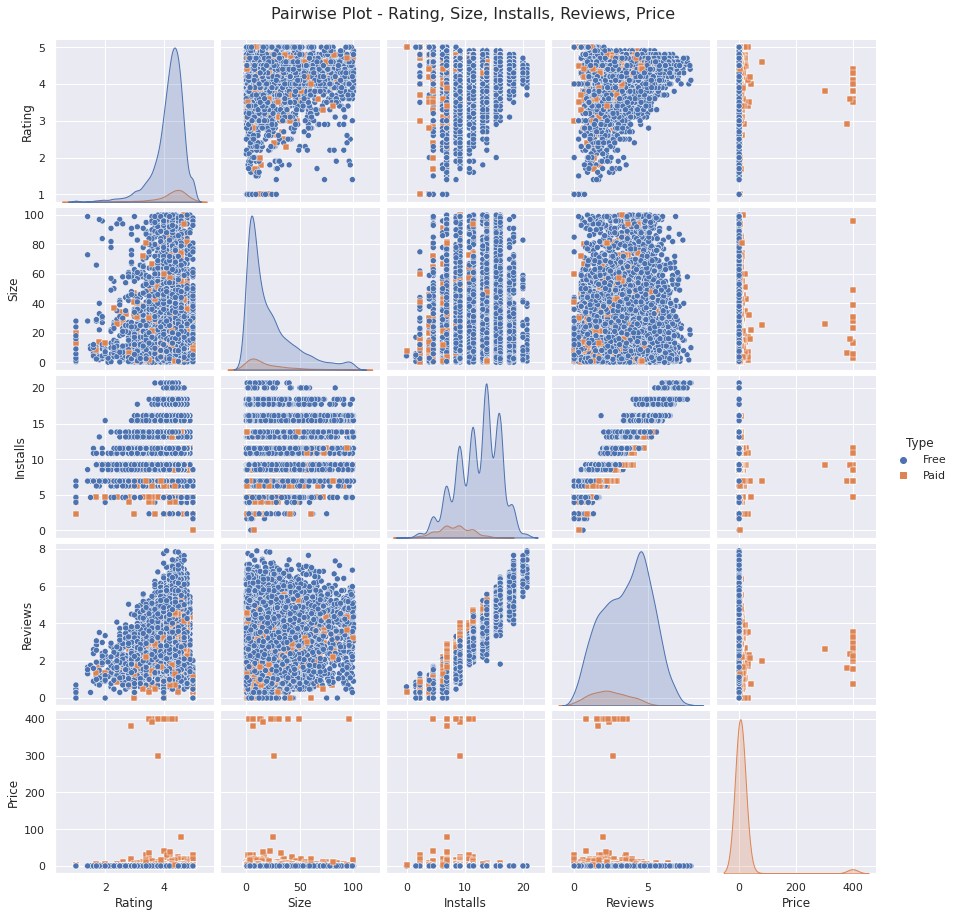

In [ ]:
r = play_store_df['Rating'].dropna()
s = play_store_df['Size'].dropna()
i = play_store_df['Installs'].dropna()
rev = play_store_df['Reviews'].dropna()
t = play_store_df['Type'].dropna()
price = play_store_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(r, s, np.log(i), np.log10(rev), price, t)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type', markers=["o", "s"])
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price", y=1.02, fontsize=16)

##### Sizing Strategy: How does the size of the app affect the ratings and number of installs?

Text(0.5, 1.02, 'Rating vs Size of Apps')

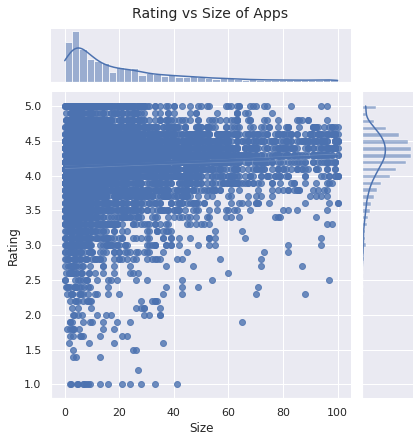

In [ ]:
sns.set_style("darkgrid")
ax = sns.jointplot(play_store_df['Size'], play_store_df['Rating'], kind="reg")
ax.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=14 )

In [ ]:
## Sizing distribution of top rated apps (>= 4.5) 
play_store_df_top_rated = play_store_df[play_store_df["Rating"]>=4.5]
sizing_distribution = [go.Histogram(x = play_store_df_top_rated.Size,)]
print('Average size of top rated apps = ', np.mean(play_store_df_top_rated['Size']))
#plotly.offline.iplot(sizing_distribution, filename='overall_sizing_distribution')
layout =dict(title = 'Average Size of top rated apps',
             xaxis = dict(title = 'Size of Apps'),
             yaxis = dict(title = 'Distribution'),
             )
sizing_distribution = dict(data = sizing_distribution, layout = layout)
plotly.offline.iplot(sizing_distribution, filename='overall_sizing_distribution')

Average size of top rated apps =  21.80610577798002


Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too bulky.

##### Sizing Strategy: Which categories have the bulkiest apps and how are they rated?

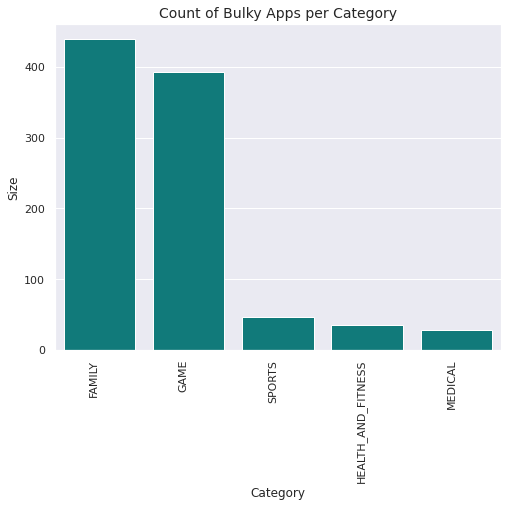

In [ ]:
bulky_apps = play_store_df[play_store_df["Size"]>40]
group_category = bulky_apps.groupby("Category")["Size"].count().sort_values(ascending=False).reset_index().head()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.barplot(x="Category", y="Size", data=group_category, color = "darkcyan")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Bulky Apps per Category',size = 14)
plt.savefig("Count_bulky")

In [ ]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(list(set(play_store_df.Category))))]

subset_df = play_store_df[play_store_df.Size > 40]
groups_temp = subset_df.groupby('Category').filter(lambda x: len(x) >20)

data = [{
    'x': groups_temp.loc[subset_df.Category==category[1]]['Rating'], 
    'type':'scatter',
    'y' : subset_df['Size'],
    'name' : str(category[1]),
    'mode' : 'markers',
    'showlegend': True,
    } for category in enumerate(['GAME', 'FAMILY'])]

layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

Most bulky apps ( >50MB) belong to the Game and Family category. Despite this, these bulky apps are fairly highly rated indicating that they are bulky for a purpose.

##### Sizing Strategy: How do the sizes of paid apps and free apps vary?

In [ ]:
paid_apps = play_store_df[play_store_df.Type == 'Paid']

data = [{
    'x' : paid_apps['Rating'],
    'type':'scatter',
    'y' : paid_apps['Size'],
    'mode' : 'markers',
    'text' : play_store_df['Size'],
    } for t in set(paid_apps.Type)]


layout = {'title':"Rating vs Size for Paid Apps", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(255,255,255)'}

plotly.offline.iplot({'data': data, 'layout': layout})

Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not bulky.
Users prefer to pay for apps that are light-weighted. A paid app that is bulky may not perform well in the market.

##### Pricing Strategy: How do App prices affect rating and number of installs?

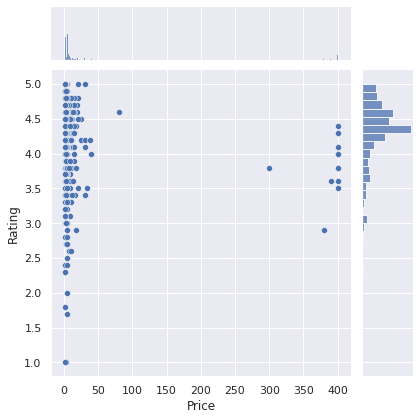

In [ ]:
paid_apps = play_store_df[play_store_df.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

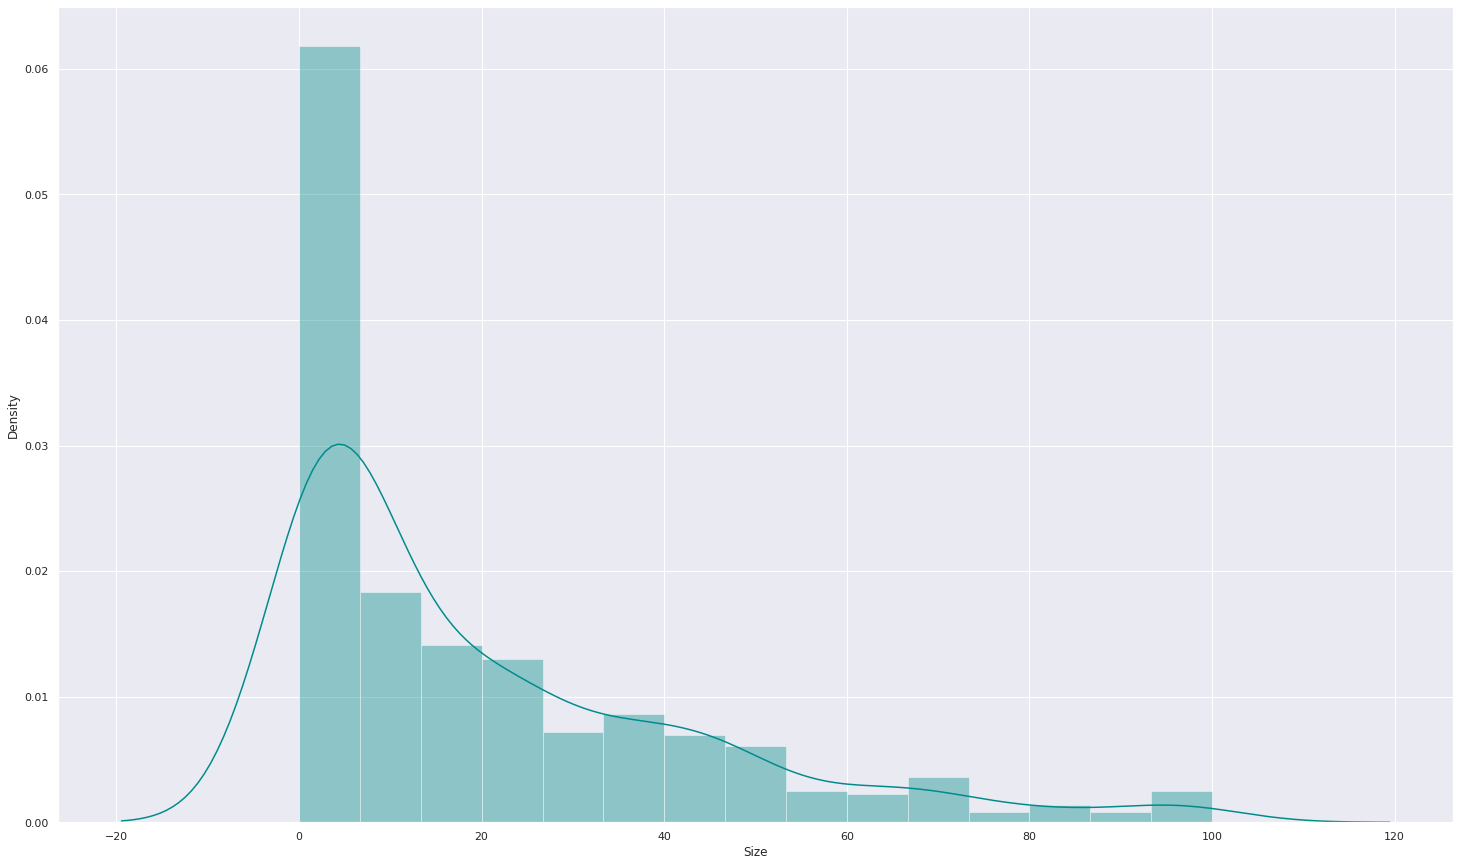

In [ ]:
size_paid_apps = paid_apps['Size'].dropna()
ax = sns.distplot(size_paid_apps, color="darkcyan")

Most top rated apps are optimally priced between ~1$ to ~30$. There are only a very few apps priced above 20$.

##### Pricing trend across categories

Text(0.5, 1.0, 'App pricing trend across categories')

<Figure size 864x432 with 0 Axes>

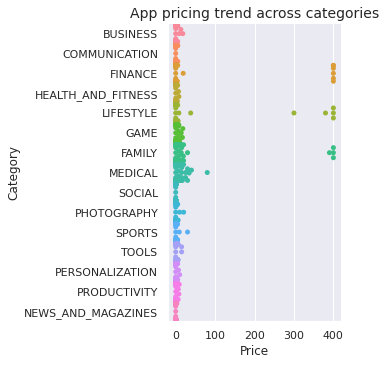

In [ ]:
top_categories = play_store_df[play_store_df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS','PRODUCTIVITY','PERSONALIZATION','SPORTS','COMMUNICATION',
                                                        'HEALTH_AND_FITNESS','NEWS_AND_MAGAZINES','SOCIAL'])]

plt.figure(figsize=(12, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.catplot(x="Price", y="Category", kind="swarm", data=top_categories)
plt.title('App pricing trend across categories',size = 14)


##### Rating Distribution

In [ ]:
## general distribution of rating
rating_distribution = [go.Histogram(
        x = play_store_df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(play_store_df['Rating']))
plotly.offline.iplot(rating_distribution, filename='overall_rating_distribution')

Average app rating =  4.173243045387998


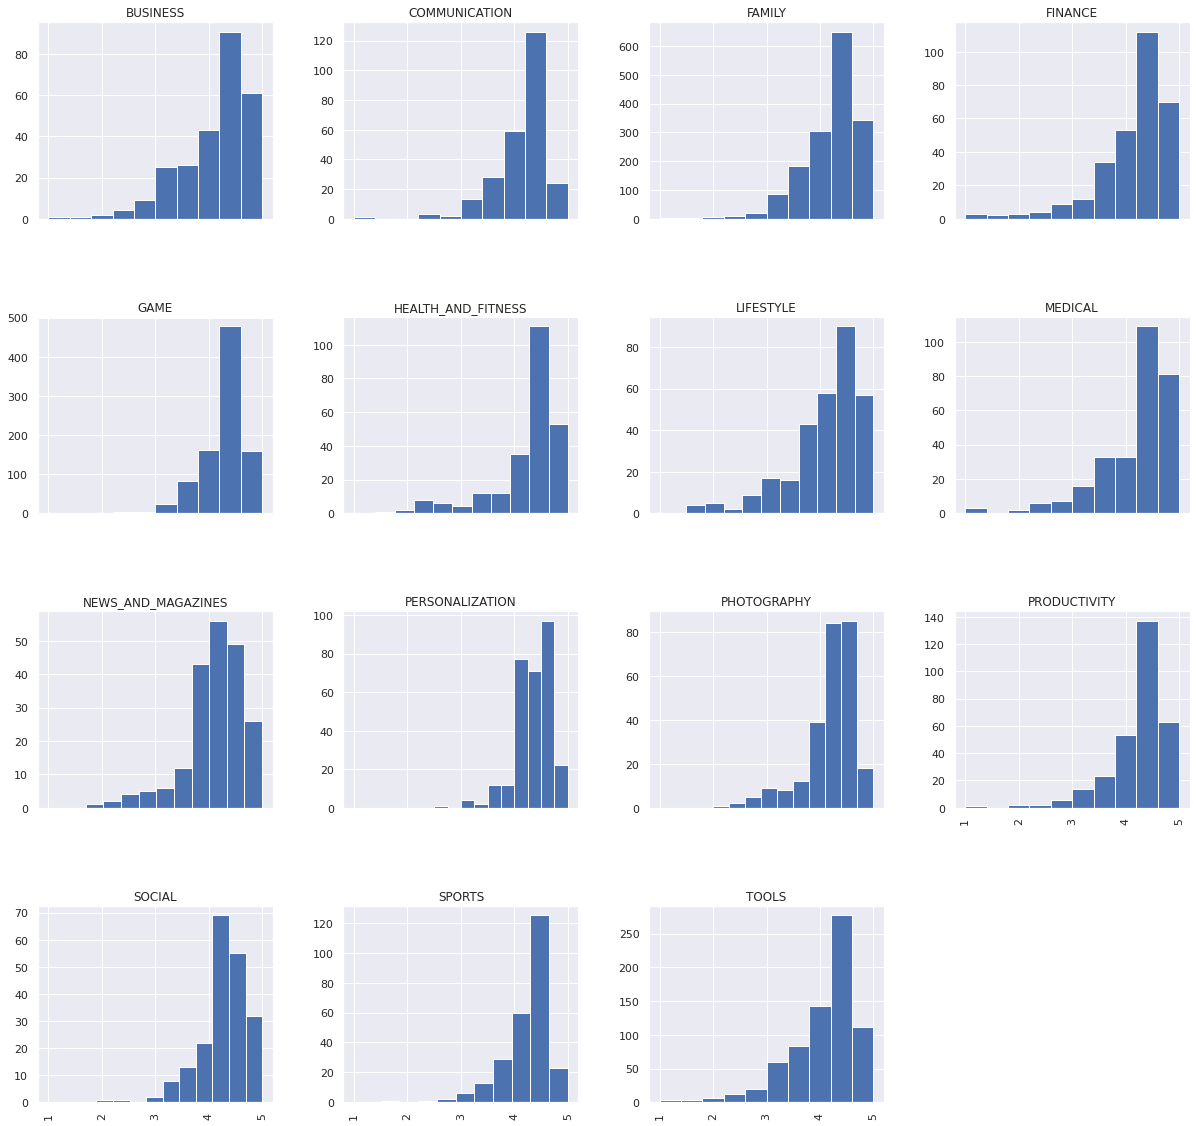

In [ ]:
top_categories = play_store_df.groupby("Category").filter(lambda x: len(x) > 200).reset_index()
array = top_categories['Rating'].hist(by=top_categories['Category'], sharex=True, figsize=(20,20))

[Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'NEWS_AND_MAGAZINES')]

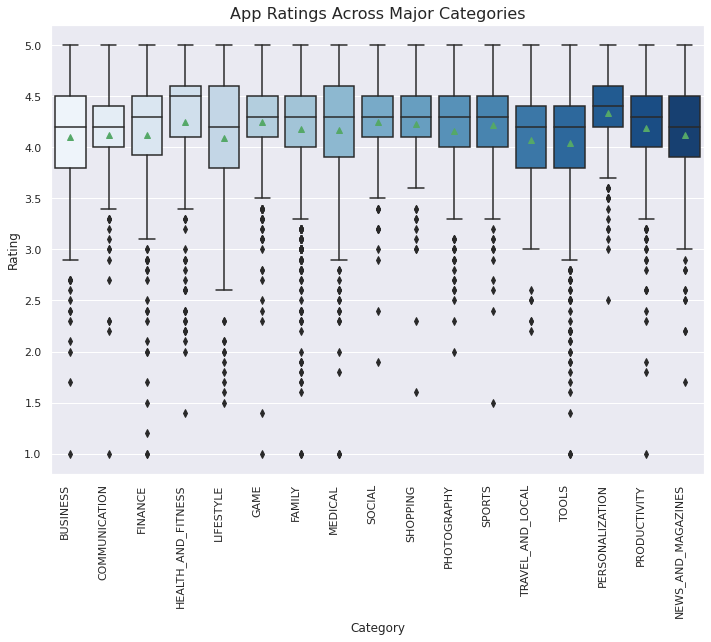

In [ ]:
topcat = play_store_df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.title("App Ratings Across Major Categories", fontsize=16)
ax = sns.boxplot(x='Category', y='Rating', data=topcat, palette='Blues', showmeans=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

The rating distribution revealed that most apps perform reasonably well with an average rating of 4.17. We broke down the average rating by category to check if any category performs exceedingly good or bad. We conducted a One-way Anova Test and confirmed that the average ratings across categories is statistically different. The Health and Fitness and Books and Reference produce the best apps with 50% apps having a rating greater than 4.5. Interestingly, half of the Dating apps have a rating lower than the average.

##### Basic Sentiment Analysis - User Reviews

In [ ]:
## Merge the two datasets
merged_df = play_store_df.merge(user_ratings_df, on = "App")
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [ ]:
## Drop the NA values
merged_df = merged_df.dropna(subset=['Translated_Review'])

In [ ]:
## let's see the distribution of postive, neg reviews in each category
sentiment_count = merged_df.groupby(["Category","Sentiment"]).agg({'App': 'count'}).reset_index()
sentiment_sum =  merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
print(sentiment_sum.head())
print(sentiment_count.head())

              Category  Sentiment
0       ART_AND_DESIGN        382
1    AUTO_AND_VEHICLES        289
2               BEAUTY        338
3  BOOKS_AND_REFERENCE        651
4             BUSINESS       1082
            Category Sentiment  App
0     ART_AND_DESIGN  Negative   61
1     ART_AND_DESIGN   Neutral   62
2     ART_AND_DESIGN  Positive  259
3  AUTO_AND_VEHICLES  Negative   17
4  AUTO_AND_VEHICLES   Neutral   36


In [ ]:
## we need to normalize it before plotting
new_df = sentiment_count.merge(sentiment_sum, on = "Category")
new_df["normalized_sentiment_counts"] = new_df["App"]/new_df["Sentiment_y"]
new_df.head()

,Category,Sentiment_x,App,Sentiment_y,normalized_sentiment_counts
0,ART_AND_DESIGN,Negative,61,382,0.159686
1,ART_AND_DESIGN,Neutral,62,382,0.162304
2,ART_AND_DESIGN,Positive,259,382,0.678010
3,AUTO_AND_VEHICLES,Negative,17,289,0.058824
4,AUTO_AND_VEHICLES,Neutral,36,289,0.124567


In [ ]:
sentiment_count_2 = merged_df.groupby(["Category","Sentiment","Installs"]).agg({'App': 'count'}).reset_index()
sentiment_sum_2 =  merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
sentiment_count_2.head()

,Category,Sentiment,Installs,App
0,ART_AND_DESIGN,Negative,100000.0,23
1,ART_AND_DESIGN,Negative,500000.0,22
2,ART_AND_DESIGN,Negative,1000000.0,10
3,ART_AND_DESIGN,Negative,5000000.0,3
4,ART_AND_DESIGN,Negative,10000000.0,3


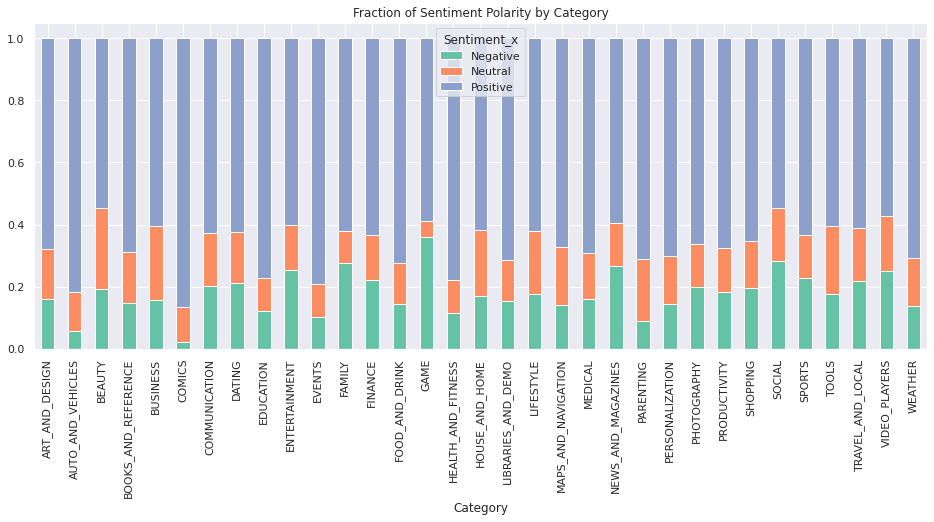

In [ ]:
new_df_stack = new_df.pivot(index='Category', columns='Sentiment_x', values='normalized_sentiment_counts')
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
sns.set(palette="Set2")
new_df_stack.plot(kind='bar', stacked = True)
plt.title("Fraction of Sentiment Polarity by Category")
plt.savefig("sentiment_dist.svg", format='svg', dpi=1200)

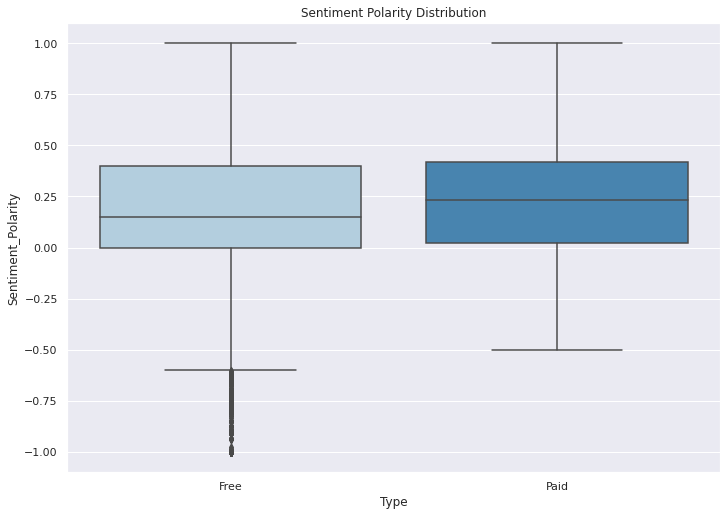

In [ ]:
## sentiment polarity and free/paid apps
#sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df, palette='Blues')
title = ax.set_title('Sentiment Polarity Distribution')

We plotted the fraction of positive, negative and neutral reviews for each category and observed that the Health and Fitness apps perform the best with more than 85% positive reviews. On the other hand, Game and Social apps have a higher fraction of negative reviews. We compared the reviews between free and paid apps and found that people are harsher towards free apps whereas users are more tolerant when they are paying for it.